  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95   

C:\Users\nh013\AppData\Local\Temp\ipykernel_7632\930933653.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
C:\Users\nh013\AppData\Local\Temp\ipykernel_7632\930933653.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


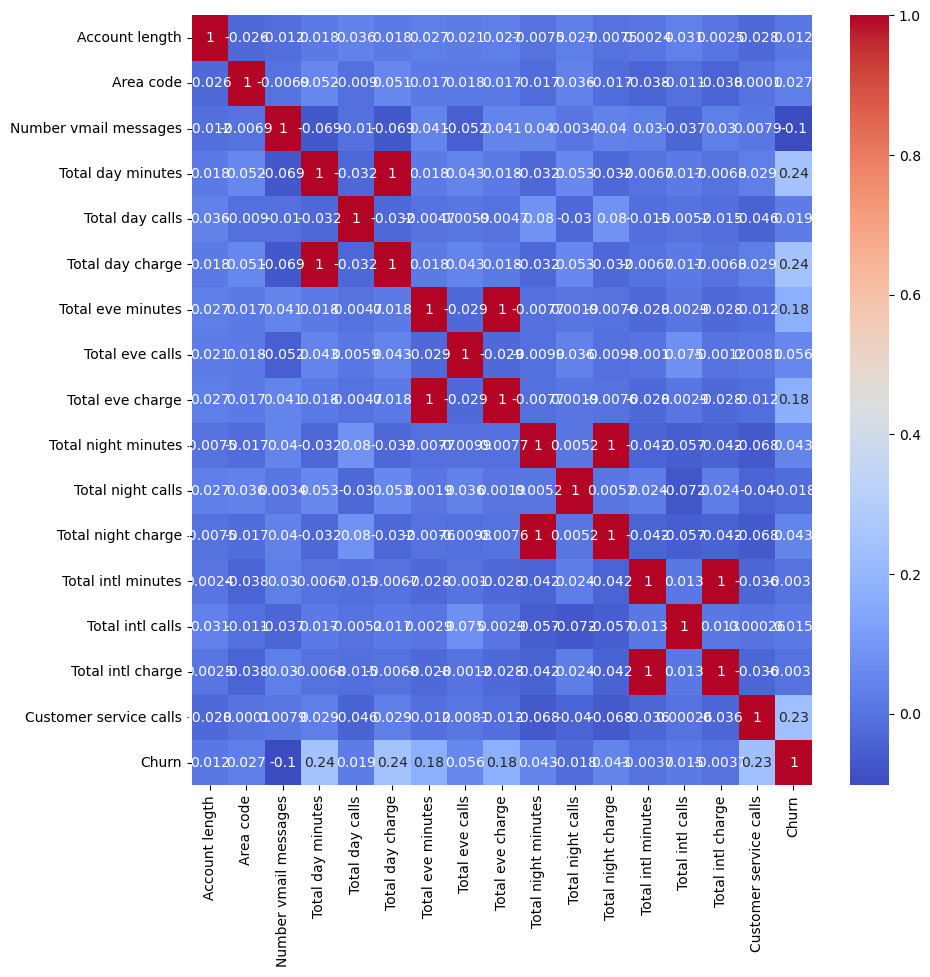

In [1]:
# preprocess step and EDA
#create a heatmap to visualize the correlation matrix.


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# DATA 
df = pd.read_csv(r"C:\Users\nh013\Desktop\telecom churn.csv\churn-bigml-20.csv")



print(df.head()) 
print(df.shape)  
print(df.info()) 


print(df.describe())

# IDENTIFYING MISSINFG VALUES
print(df.isna().sum())

# TARGET VARIABLE 'CHURN'
print(df['Churn'].value_counts(normalize=True))

# CORRELELATION BETWEEN FEATURE
print(df.corr())


# BUILD HEATMAP
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [4]:
#using handling missing data, encoding categorical variables, and scaling numerical features.


import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column, threshold=3):
    """
    This function replaces outlier values in a column of a dataframe with the median value.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the column to be cleaned.
    column (str): The name of the column to be cleaned.
    threshold (float): The threshold for determining outlier values.

    Returns:
    pandas.DataFrame: The cleaned dataframe.
    """
    median = df[column].median()
    std = df[column].std()
    outliers = (df[column] - median).abs() > threshold * std
    df.loc[outliers, column] = median
    return df




# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\telecom churn.csv\churn-bigml-20.csv")

# FEATURE SELCTION
df = df[['State','Account length','Area code','International plan','Voice mail plan','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn'
        ]]

# IDENTIFYING MISSING VALUES
print(df.isnull().sum())

# DDROP MISSING VALUES
df.dropna(inplace=True)


#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)


#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)

# DROP UNNEED COLUMN
df.drop('State', axis=1, inplace=True)



# ONE HOT ENCODING
df = pd.get_dummies(df, columns=['Area code', 'International plan', 'Voice mail plan'])


# HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')


# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])



print(df)
print(df.shape[0])

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64
     Account length  Number vmail messages  Total day minutes  \
0          0.347127              -0.601245           0.064036   
1         -0.927731              -0.601245          -0.934756   
2          1.425853              -0.601245           2.739500   
3          0.200028              -0.601245          -1.271894   
4         -1.319994              -0.601245          -1.111438   
..              ...                  

C:\Users\nh013\AppData\Local\Temp\ipykernel_7632\3380712766.py:44: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_7632\3605022558.py:45: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


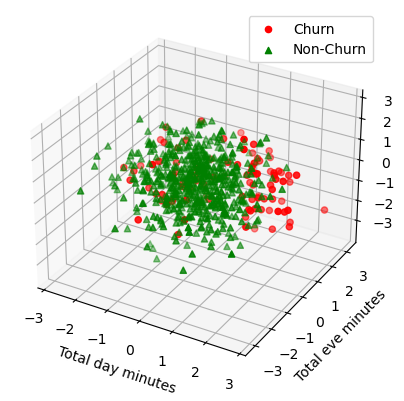

In [5]:

# VISUALIZE CHURN AND NON CHURN IN 3D PLOT

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column, threshold=3):
    """
    This function replaces outlier values in a column of a dataframe with the median value.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the column to be cleaned.
    column (str): The name of the column to be cleaned.
    threshold (float): The threshold for determining outlier values.

    Returns:
    pandas.DataFrame: The cleaned dataframe.
    """
    median = df[column].median()
    std = df[column].std()
    outliers = (df[column] - median).abs() > threshold * std
    df.loc[outliers, column] = median
    return df


# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\telecom churn.csv\churn-bigml-20.csv")


# FEATURE SELECTION
df = df[['State','Account length','Area code','International plan','Voice mail plan','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn'
        ]]

# IDENTIFYING MISSINFG VALUES
print(df.isnull().sum())


# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)


#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)


#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)

# DROP COLUMN
df.drop('State', axis=1, inplace=True)



# ONE- HOT ENCODING  TO THE CATEGORICAL VARIABLE
df = pd.get_dummies(df, columns=['Area code', 'International plan', 'Voice mail plan'])


# HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN

scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])




# BUILD 3D PLOT
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


churn = df[df['Churn'] == 1]
non_churn = df[df['Churn'] == 0]

ax.scatter(churn['Total day minutes'], churn['Total eve minutes'], churn['Total intl minutes'], c='r', marker='o', label='Churn')
ax.scatter(non_churn['Total day minutes'], non_churn['Total eve minutes'], non_churn['Total intl minutes'], c='g', marker='^', label='Non-Churn')

ax.set_xlabel('Total day minutes')
ax.set_ylabel('Total eve minutes')
ax.set_zlabel('Total intl minutes')

plt.legend(loc='best')
plt.show()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_7632\3400091875.py:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


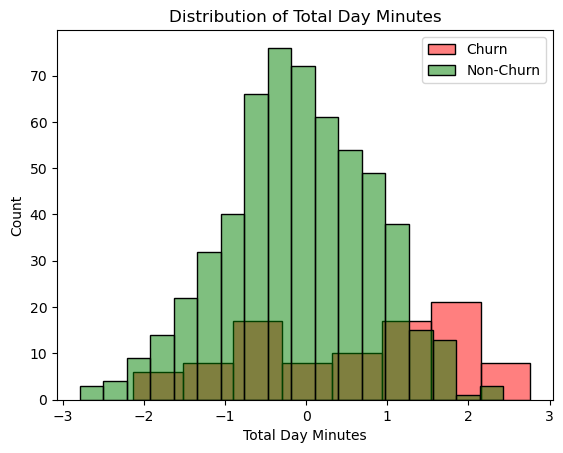

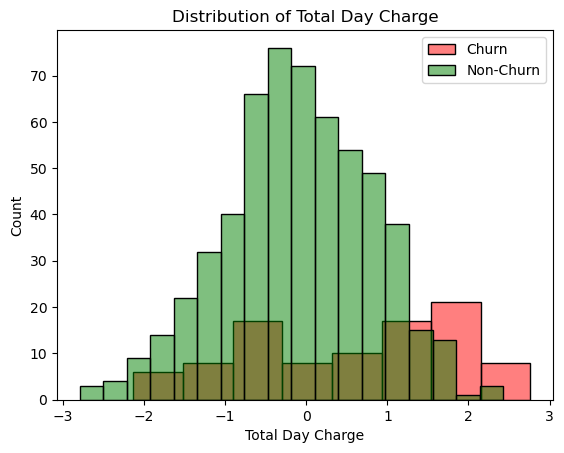

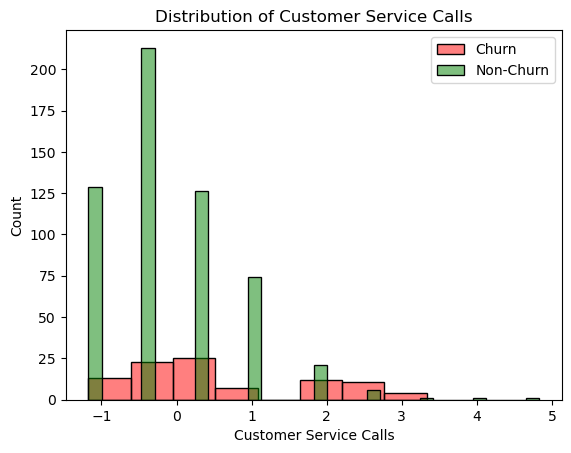

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

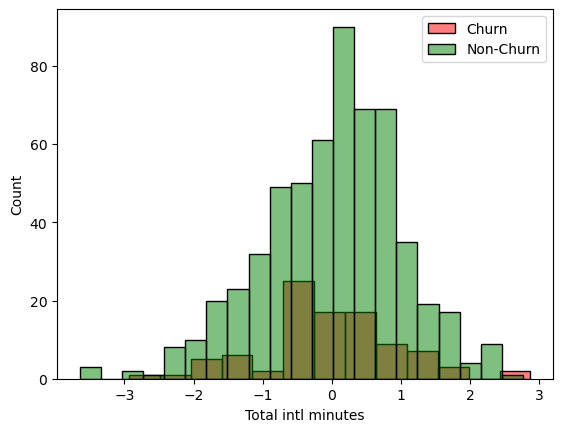

In [6]:
# EDA ANALYSIS


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\telecom churn.csv\churn-bigml-20.csv")

# FEATURE SELECTION
df = df[['State','Account length','Area code','International plan','Voice mail plan','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn']]

# IDENTIFYING MISSINFG VALUES
print(df.isnull().sum())


# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)

# DROP THE COLUMN
df.drop('State', axis=1, inplace=True)

# ONE-HOT ENCODING
df = pd.get_dummies(df, columns=['Area code', 'International plan', 'Voice mail plan'])

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# SPLIT THE DATA SET INTO CHURN AND NON CHURN CLASEES

churn_df = df[df['Churn'] == 1]
non_churn_df = df[df['Churn'] == 0]


# FEATURE EXPLORATION


sns.histplot(churn_df['Total day minutes'], label='Churn', color='red', alpha=0.5)
sns.histplot(non_churn_df['Total day minutes'], label='Non-Churn', color='green', alpha=0.5)
plt.legend()
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.show()


sns.histplot(churn_df['Total day charge'], label='Churn', color='red', alpha=0.5)
sns.histplot(non_churn_df['Total day charge'], label='Non-Churn', color='green', alpha=0.5)
plt.legend()
plt.title('Distribution of Total Day Charge')
plt.xlabel('Total Day Charge')
plt.show()


sns.histplot(churn_df['Customer service calls'], label='Churn', color='red', alpha=0.5)
sns.histplot(non_churn_df['Customer service calls'], label='Non-Churn', color='green', alpha=0.5)
plt.legend()
plt.title('Distribution of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.show()


sns.histplot(churn_df['Total intl minutes'], label='Churn', color='red', alpha=0.5)
sns.histplot(non_churn_df['Total intl minutes'], label='Non-Churn', color='green', alpha=0.5)
plt.legend()
plt.title

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_7632\1629158013.py:43: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


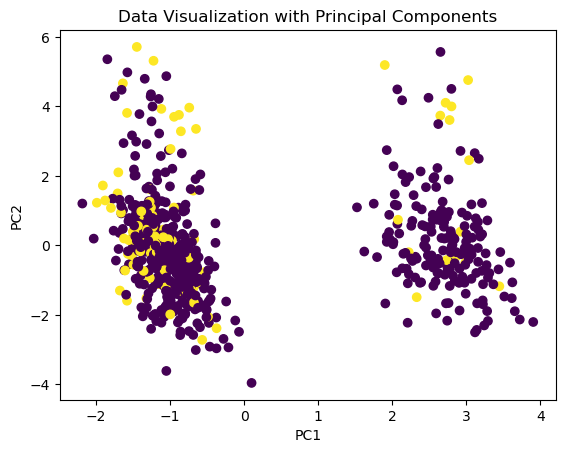

In [7]:
# data visualization with principle components analysis (pca)

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def handle_outliers(df, column, threshold=3):
    """
    This function replaces outlier values in a column of a dataframe with the median value.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the column to be cleaned.
    column (str): The name of the column to be cleaned.
    threshold (float): The threshold for determining outlier values.

    Returns:
    pandas.DataFrame: The cleaned dataframe.
    """
    median = df[column].median()
    std = df[column].std()
    outliers = (df[column] - median).abs() > threshold * std
    df.loc[outliers, column] = median
    return df


# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\telecom churn.csv\churn-bigml-20.csv")


df = df[['State','Account length','Area code','International plan','Voice mail plan','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn'
        ]]

# IDENTIFYING MISSINFG VALUES
print(df.isnull().sum())

# DROP ROWS WITH MISSING VALUES

df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)

# DROP THE COLUMN
df.drop('State', axis=1, inplace=True)

# ONE -HOT ENCODING
df = pd.get_dummies(df, columns=['Area code', 'International plan', 'Voice mail plan'])

# HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


# PCA 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Churn'] = df['Churn']

# VISUALIZE DATA
plt.scatter(x=df_pca['PC1'], y=df_pca['PC2'], c=df_pca['Churn'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data Visualization with Principal Components')
plt.show()